In [38]:
# 1 -> array[100]
# can we learn to reproduce a whole timeseries given a parameter?
# y is sin over 0.0-1.0 with (fixed frequency 10PI) and phase offset (x)

# works, and accuracy is functional. Why does it plateau?

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

# might need to comment this out if you don't have a GPU
# perhaps unecessary in general, but I haven't found a way to make it work!
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import Callback

from sklearn.model_selection import train_test_split

((2000,), (2000, 128))

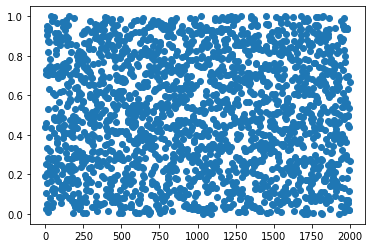

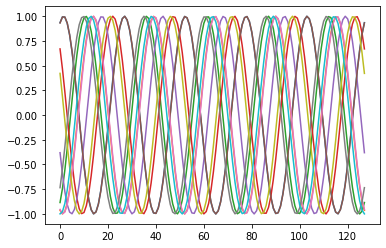

In [27]:
# x: given a random phase offset (I used fraction from 0.0 - 1.0)
# y: sine curve from 0.0 - 1.0 at freq 10*PI with given offset

N_POINTS = 128
N_EXAMPLES = 2000

def gen_example(phase_offset_frac, freq=1, amp=1):
    """phase_offset_frac in 0.0-1.0"""
    us = np.linspace(0, 1, N_POINTS)
    xs = us * (np.pi * 2) * freq + (2.0 * np.pi * phase_offset_frac)
    ys = np.sin(xs) * amp
    return np.array(ys)

phase_fracs = np.array([random.random() for _ in range(N_EXAMPLES)])
pairs = np.array([(phase_frac, gen_example(phase_frac, 5)) for phase_frac in phase_fracs])

plt.scatter(list(range(len(phase_fracs))), phase_fracs)
plt.figure()

for i in range(0, N_EXAMPLES, 200):
    xs, ys = pairs[i]
    plt.plot(ys)

xs = np.array([pair[0] for pair in pairs])
ys = np.array([pair[1] for pair in pairs])
xs.shape, ys.shape

In [28]:
# train / test split
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.33)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1340,), (1340, 128), (660,), (660, 128))

In [29]:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
#     loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
#     print(f'Test loss: {loss:.3}')

#     print(f'Test accuracy: {accuracy:.3}')

0/0.4729/0.0088/0.4457/0.0175 1/0.4216/0.0150/0.3905/0.0175 2/0.3700/0.0150/0.3443/0.0175 3/0.3311/0.0156/0.3120/0.0125 4/0.3046/0.0169/0.2895/0.0125 5/0.2838/0.0137/0.2692/0.0100 6/0.2624/0.0200/0.2477/0.0250 7/0.2398/0.0256/0.2249/0.0300 8/0.2166/0.0269/0.2024/0.0350 9/0.1931/0.0344/0.1814/0.0625 10/0.1712/0.0500/0.1597/0.0875 11/0.1508/0.0831/0.1413/0.1075 12/0.1331/0.1063/0.1261/0.1275 13/0.1191/0.1025/0.1138/0.1250 14/0.1081/0.0950/0.1044/0.0975 15/0.0998/0.0887/0.0986/0.1500 16/0.0943/0.1031/0.0936/0.0925 17/0.0900/0.1088/0.0905/0.1375 18/0.0869/0.0988/0.0872/0.1025 19/0.0837/0.1031/0.0842/0.1075 20/0.0813/0.1106/0.0818/0.1250 21/0.0788/0.0913/0.0803/0.1150 22/0.0767/0.1025/0.0774/0.1125 23/0.0744/0.1006/0.0747/0.1050 24/0.0721/0.1063/0.0719/0.1250 25/0.0695/0.1125/0.0713/0.0950 26/0.0673/0.1106/0.0669/0.1200 27/0.0641/0.1100/0.0642/0.1125 28/0.0615/0.1156/0.0612/0.1325 29/0.0589/0.1119/0.0592/0.1300 30/0.0561/0.1206/0.0561/0.1375 31/0.0533/0.1150/0.0532/0.0775 32/0.0506/0.1169/0

260/0.0003/0.5412/0.0002/0.6100 261/0.0004/0.5213/0.0006/0.4525 262/0.0004/0.5275/0.0006/0.4725 263/0.0003/0.5131/0.0003/0.5125 264/0.0004/0.5263/0.0002/0.5900 265/0.0003/0.5263/0.0004/0.5000 266/0.0004/0.5106/0.0008/0.4450 267/0.0004/0.5300/0.0002/0.6025 268/0.0003/0.5275/0.0004/0.5575 269/0.0003/0.5244/0.0003/0.5375 270/0.0004/0.5181/0.0001/0.6050 271/0.0003/0.5319/0.0002/0.5825 272/0.0004/0.5188/0.0003/0.5250 273/0.0004/0.5025/0.0003/0.5425 274/0.0003/0.5387/0.0001/0.5750 275/0.0003/0.5356/0.0003/0.5200 276/0.0004/0.5250/0.0003/0.5425 277/0.0003/0.5444/0.0004/0.5775 278/0.0003/0.5294/0.0005/0.4625 279/0.0004/0.5088/0.0002/0.5700 280/0.0003/0.5362/0.0001/0.5625 281/0.0003/0.5250/0.0002/0.5625 282/0.0003/0.5275/0.0009/0.4175 283/0.0004/0.5169/0.0004/0.5200 284/0.0003/0.5294/0.0003/0.5375 285/0.0003/0.5244/0.0003/0.5150 286/0.0004/0.5238/0.0005/0.4925 287/0.0003/0.5469/0.0004/0.5450 288/0.0004/0.5319/0.0003/0.5775 289/0.0003/0.5412/0.0003/0.5700 290/0.0003/0.5462/0.0001/0.6075 291/0.00

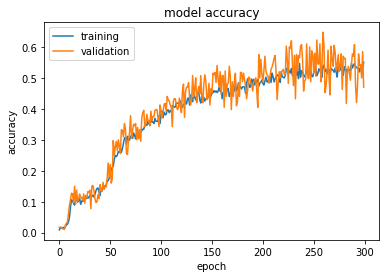

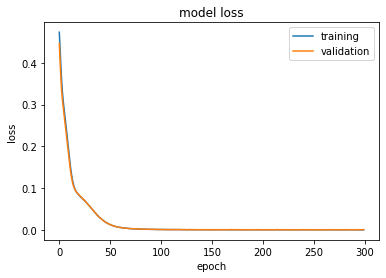

In [31]:
from tensorflow.keras.callbacks import Callback
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('{:d}/{:.4f}/{:.4f}/{:.4f}/{:.4f} '.format(epoch, logs['loss'], logs['accuracy'], 
            logs['val_loss'], logs['val_accuracy']), end='')

test_data = x_test
test_labels = y_test

model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=N_POINTS))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(units=N_POINTS))

model.compile(optimizer="rmsprop", loss='mean_squared_error', metrics=['accuracy'])
# model.summary()

history = model.fit(xs, ys, batch_size=64, epochs=300, verbose=0, validation_split=.2, callbacks=[MyCallback()])
plot_training_history(history, model)

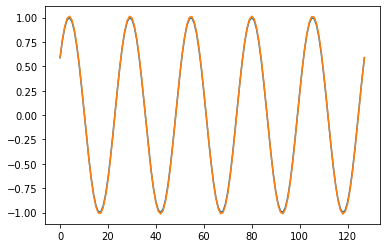

In [34]:
# looks pretty good
phase_frac = 0.1
ys = gen_example(phase_frac, 5)
plt.plot(ys)
_ = plt.plot(model.predict([phase_frac])[0])

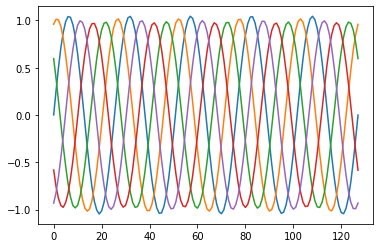

In [37]:
# clearly some issues, see the wobble at the top when all curves should reach same amplitude
for phase_frac in np.arange(0.0, 1.0, 0.2):
    _ = plt.plot(model.predict([phase_frac])[0])    